In [ ]:
!pip install giotto-tda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gtda.images  
import gtda.homology
import gtda.diagrams
import cv2 as cv
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = keras.datasets.mnist
(train, digit_train), (test, digit_test) = mnist.load_data()

images = np.concatenate((train,test), axis = 0)
data_dim = np.shape(images)[0]
image_dim = 28

conjugate_images = np.zeros((70000,28,28))
for i in range(0,70000):
  conjugate_images[i,:,:] =  255 - images[i,:,:]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#%%plots image_dim*image_dim np array
def plot_image(Q):
    plt.matshow(Q);
    plt.colorbar()

Printing first 5 images


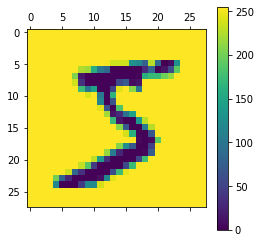

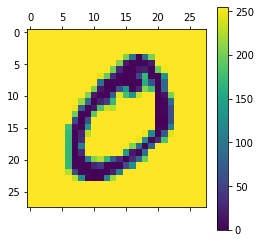

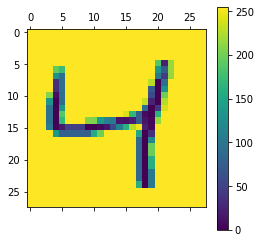

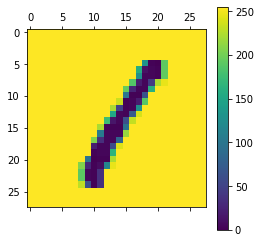

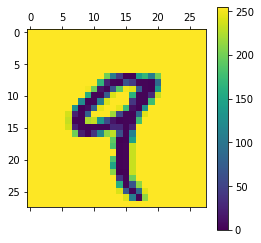

In [ ]:
print('Printing first 5 images')
for i in range(0,5):
  plot_image(conjugate_images[i])

In [ ]:
transformer = gtda.images.Binarizer(threshold = 0.2).fit(images)
binarized_images= transformer.transform(images)*1

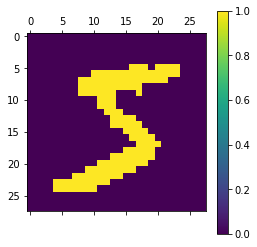

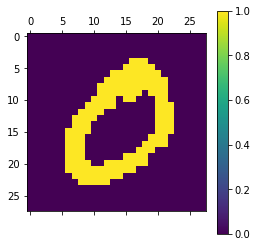

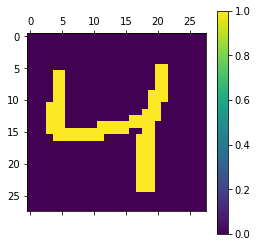

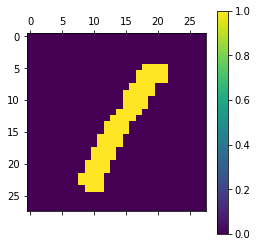

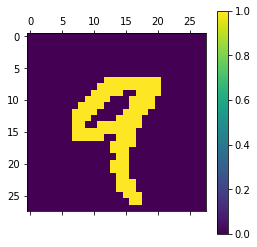

In [ ]:
for i in range(0,5):
  plot_image(binarized_images[i])

In [ ]:
height_array = [[1,0],[0,1],[1,1],[-1,1],[1,-1],[-1,-1],[-1,0],[0,-1]]

def height_data_fn(images = binarized_images, ht_array = height_array, ent=True, land=False, 
                   heat=False, wdist=False, betti=False):
    height_data = np.zeros((np.shape(images)[0],1))
    for i in range(0, np.shape(ht_array)[0]):
        height_fil_images = gtda.images.HeightFiltration(direction = np.array(ht_array[i])).fit_transform(images)
        cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(height_fil_images)
        if ent == True:
            height_data = np.concatenate((height_data,gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)), axis = 1)
        if land == True:
            height_data= np.concatenate((height_data,gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                                             order = None).fit_transform(cubical_diagrams)), axis = 1)
        if heat == True:
            height_data = np.concatenate((height_data,gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)),
                                         axis = 1)
        if betti == True:
            height_data = np.concatenate((height_data,gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)),
                                         axis = 1)
        if wdist == True:
            height_data = np.concatenate((height_data,gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)),
                                         axis = 1)   
    print("done") 
    return height_data[:,1:]

In [ ]:
radial_array = [[6,6],[13,6],[20,6],[6,13],[13,13],[20,13],[6,20],[13,20],[20,20]]

def radial_data_fn(images = binarized_images, r_array = radial_array, ent=True, land=False, 
                   heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)*np.shape(r_array)[0]
    radial_data = np.zeros((np.shape(images)[0],n_col))
    m = 0 #current column counter
    for i in range(0, np.shape(r_array)[0]):
        radial_fil_images = gtda.images.RadialFiltration(center = np.array(r_array[i])).fit_transform(images)
        cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(radial_fil_images)
        if ent == True:
            radial_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
            m = m + 2
        if land == True:
            radial_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                           order = None).fit_transform(cubical_diagrams)
            m = m+2
        if heat == True:
            radial_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if betti == True:
            radial_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if wdist == True:
            radial_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
            m = m + 2
    print("done")                       
    return radial_data


In [ ]:
density_array = [5,8,11]

def density_data_fn(images = binarized_images, d_array = density_array, ent=True, land=False, 
                    heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)*np.shape(d_array)[0]
    density_data = np.zeros((np.shape(images)[0],n_col))
    m = 0 #current column counter
    for i in range(0, np.shape(d_array)[0]):
        density_fil_images = gtda.images.DensityFiltration(radius = d_array[i]).fit_transform(images)
        cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(density_fil_images)
        if ent == True:
            density_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
            m = m + 2
        if land == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                           order = None).fit_transform(cubical_diagrams)
            m = m+2
        if heat == True:
            density_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if betti == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if wdist == True:
            density_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
            m = m + 2
    print("done") 
    return density_data

In [ ]:
def grayscale_data_fn(images = images, ent=True, land=False, 
                      heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    grayscale_data = np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(images)
    m=0
    if ent == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        grayscale_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        grayscale_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2  
    print("done")          
    return grayscale_data

In [ ]:
def vr_data_fn(images = binarized_images, ent=True, land=False, 
               heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    vr_data = np.zeros((np.shape(images)[0],n_col))
    point_cloud_data = gtda.images.ImageToPointCloud().fit_transform(images)
    cubical_diagrams = gtda.homology.VietorisRipsPersistence(reduced_homology = False, infinity_values= 28.0).fit_transform(point_cloud_data)
    m=0
    if ent == True:
        vr_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2}, metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        vr_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        vr_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2 
    print("done")           
    return vr_data

In [ ]:
def dilation_data(images = binarized_images, ent=True, land=False, 
                  heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    dil_data =  np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(gtda.images.DilationFiltration().fit_transform(images))
    m=0
    if ent == True:
        dil_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        dil_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2} , metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        dil_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        dil_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        dil_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2  
    print("done")          
    return dil_data

In [ ]:
def erosion_data_fn(images = binarized_images, ent=True, land=False, 
                    heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    erosion_data =  np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(gtda.images.ErosionFiltration().fit_transform(images))
    m=0
    if ent == True:
        erosion_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        erosion_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2}, metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        erosion_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        erosion_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        erosion_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2  
    print("done")         
    return erosion_data

In [ ]:
def sd_data_fn(images = binarized_images, ent=True, land=False, 
               heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)
    sd_data =  np.zeros((np.shape(images)[0],n_col))
    cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(gtda.images.SignedDistanceFiltration().fit_transform(images))
    m=0
    if ent == True:
        sd_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
        m = m + 2
    if land == True:
        sd_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2}, metric ='landscape', 
                                                        order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if heat == True:
        sd_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if betti == True:
        sd_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
        m = m + 2
    if wdist == True:
        sd_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
        m = m + 2  
    print("done")          
    return sd_data

In [ ]:
# ax+by+c denotes line we are considering
def direction_filtration(Q,a,b,c, par = True):
    shape_x = np.shape(Q)[0]
    shape_y = np.shape(Q)[1]
    Qnew = np.zeros((shape_x,shape_y))
    for i in range(0,shape_x):
        for j in range(0,shape_y):
            if par and Q[i][j] == 1:
                Qnew[i][j] = abs(a*i + b*j + c)/((a**2 + b**2)**(1/2))
            if par != True and Q[i][j] == 1:
                Qnew[i][j] = -1 * abs(a*i + b*j + c)/((a**2 + b**2)**(1/2))
    max_val = np.max(Qnew)
    for i in range(0,shape_x):
        for j in range(0,shape_y):
            if Q[i][j] == 0:
                Qnew[i][j] = max_val+5
    return Qnew


In [ ]:
#line filtration corr to a,b,c for line of form ax+by+c = 0

def line_filtration(nparr, coeff, l):
    line_data = np.zeros((np.shape(coeff)[0],np.shape(nparr)[0],image_dim,image_dim))  
    for k in range(0,np.shape(nparr)[0]):
        for t in range(0,np.shape(coeff)[0]):
            line_data[t][k] = direction_filtration(binarized_images[k], a = coeff[t][0]
                                                   ,b = coeff[t][1]
                                                   ,c = coeff[t][2]
                                                   ,par = l[t])
    return line_data


In [ ]:
l = np.array((True, True, False, False))
coeff = [[1,-1,-20],[0,1,-27],[0,1,-13],[1,0,-13]]

def line_data_fn(images = binarized_images, ent=True, land=False, 
                 heat=False, wdist=False, betti=False):
    n_col = (2*ent + 2*land + 2*heat + 2*wdist +2*betti)*np.shape(coeff)[0]
    line_data =  np.zeros((np.shape(images)[0],n_col))
    line_fil_images = line_filtration(images,coeff, l)
    m = 0 #current column counter
    for i in range(0, np.shape(coeff)[0]):
        cubical_diagrams = gtda.homology.CubicalPersistence(reduced_homology = False).fit_transform(line_fil_images[i])
        if ent == True:
            line_data[:,m:m+2] = gtda.diagrams.PersistenceEntropy().fit_transform(cubical_diagrams)
            m = m + 2
        if land == True:
            line_data[:,m:m+2] = gtda.diagrams.Amplitude(metric_params={"n_layers":2}, metric ='landscape', 
                                                           order = None).fit_transform(cubical_diagrams)
            m = m+2
        if heat == True:
            line_data[:,m:m+2]= gtda.diagrams.Amplitude(metric = 'heat', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if betti == True:
            line_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(cubical_diagrams)
            m = m + 2
        if wdist == True:
            line_data[:,m:m+2] = gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(cubical_diagrams)
            m = m + 2     
    print("done") 
    return line_data

In [ ]:
height_data = height_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
pd.DataFrame(height_data).to_csv('height_data.csv')
density_data = density_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
pd.DataFrame(density_data).to_csv('density_data.csv')
radial_data = radial_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
pd.DataFrame(radial_data).to_csv('radial_data.csv')
line_data = line_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
pd.DataFrame(line_data).to_csv('line_data.csv')
grayscale_data = grayscale_data_fn(images = images, ent = True, wdist = True, land = True, betti = True)
pd.DataFrame(grayscale_data).to_csv('grayscale_data.csv')
conjugate_data = grayscale_data_fn(images = conjugate_images, ent = True, wdist = True, land = True, betti = True)
pd.DataFrame(conjugate_data).to_csv('conjugate_data.csv')
vr_data = vr_data_fn(images = binarized_images, ent = True)
pd.DataFrame(vr_data).to_csv('vr_data.csv')

In [ ]:
!zip all_vect_new.zip *.csv

  adding: conjugate_data.csv (deflated 68%)
  adding: density_data.csv (deflated 65%)
  adding: grayscale_data.csv (deflated 68%)
  adding: height_data.csv (deflated 73%)
  adding: line_data.csv (deflated 74%)
  adding: radial_data.csv (deflated 63%)
  adding: vr_data.csv (deflated 71%)


In [ ]:
!mv all_vect_new.zip "/content/drive/My Drive"

In [ ]:
################################### Classification using Random Forset ####################################

In [ ]:
!unzip  "/content/drive/My Drive/all_vect_new.zip"

Archive:  /content/drive/My Drive/all_vect_new.zip
  inflating: conjugate_data.csv      
  inflating: density_data.csv        
  inflating: grayscale_data.csv      
  inflating: height_data.csv         
  inflating: line_data.csv           
  inflating: radial_data.csv         
  inflating: vr_data.csv             


In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
height_data = (pd.read_csv("height_data.csv")).iloc[:,1:]
density_data = (pd.read_csv("density_data.csv")).iloc[:,1:]
radial_data = (pd.read_csv("radial_data.csv")).iloc[:,1:]
line_data = (pd.read_csv("line_data.csv")).iloc[:,1:]
grayscale_data = (pd.read_csv("grayscale_data.csv")).iloc[:,1:]
conjugate_data = (pd.read_csv("conjugate_data.csv")).iloc[:,1:]
vr_data = (pd.read_csv("vr_data.csv")).iloc[:,1:]

In [ ]:
data = pd.concat([height_data,radial_data,density_data,line_data,grayscale_data,conjugate_data, vr_data], axis = 1)
train_data = data.iloc[:60000,]
test_data = data.iloc[60000:,]

In [ ]:
classifier = RandomForestClassifier(n_estimators = 1000, random_state = 31415)
classifier.fit(train_data, digit_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=31415,
                       verbose=0, warm_start=False)

In [ ]:
test_pred = classifier.predict(test_data)
diff = pd.DataFrame(test_pred - digit_test , columns = ['values'])
mismatch = diff[diff['values']!= 0]
print('Accuracy of model is', 100 - np.shape(mismatch)[0]*100/np.shape(test)[0])

Accuracy of model is 97.1


In [ ]:
feature_imp = pd.DataFrame(data = {'0': classifier.feature_importances_, '1': range(0,210)}).sort_values(by = ['0'], ascending=False)
featuresort = np.array(feature_imp['1'])
feature_imp_1 = classifier.feature_importances_

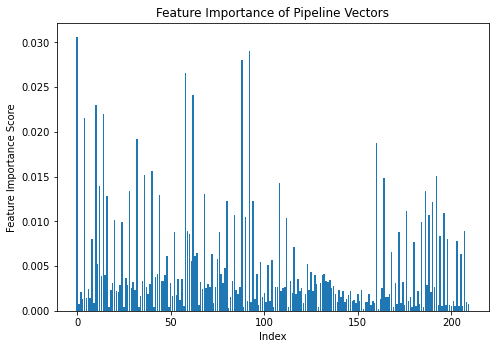

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Feature Importance of Pipeline Vectors')
ax.bar(range(0,210),feature_imp_1)
ax.set_ylabel('Feature Importance Score')
ax.set_xlabel('Index')
plt.show()

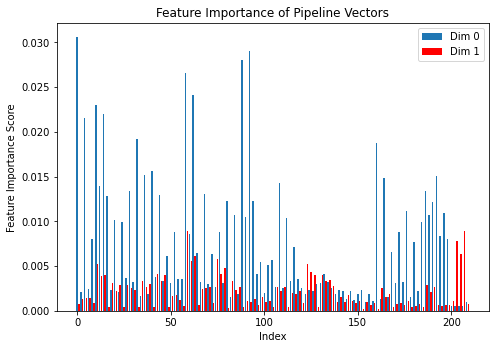

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Feature Importance of Pipeline Vectors')
ax.bar(range(0,210,2),feature_imp_1[np.arange(0,210,2)])
ax.bar(range(1,210,2),feature_imp_1[np.arange(1,210,2)], color = 'r')
ax.set_ylabel('Feature Importance Score')
ax.set_xlabel('Index')
ax.legend(labels=['Dim 0', 'Dim 1'])
plt.show()

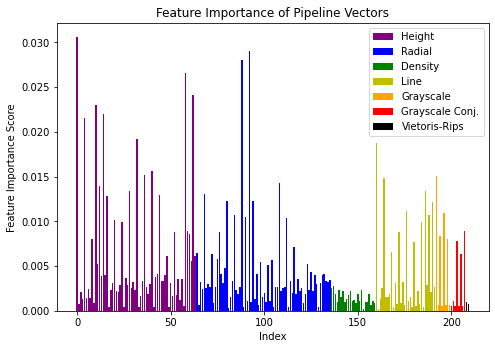

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Feature Importance of Pipeline Vectors')
ax.bar(range(0,64),feature_imp_1[np.arange(0,64)], color = 'purple')
ax.bar(range(64,136),feature_imp_1[np.arange(64,136)], color = 'b')
ax.bar(range(136,160),feature_imp_1[np.arange(136, 160)], color = 'g')
ax.bar(range(160, 192),feature_imp_1[np.arange(160,192)], color = 'y')
ax.bar(range(192,200),feature_imp_1[np.arange(192,200)], color = 'orange')
ax.bar(range(200, 208),feature_imp_1[np.arange(200, 208)], color = 'r')
ax.bar(range(208, 210),feature_imp_1[np.arange(208, 210)], color = 'black')
ax.set_ylabel('Feature Importance Score')
ax.set_xlabel('Index')
ax.legend(labels=['Height', 'Radial', 'Density', 'Line', 'Grayscale', 'Grayscale Conj.', 'Vietoris-Rips'])
plt.show()

In [ ]:
y = []
for i in range(50,230,20):
  data_sub = data.iloc[:, featuresort[:i]]
  X_train = data_sub.iloc[:60000,:]
  X_test = data_sub.iloc[60000:,:]
  clf_1 = RandomForestClassifier(n_estimators = 1000, random_state=314)
  clf_1.fit(X_train, digit_train)
  Y_pred_1=clf_1.predict(X_test)
  y.append(metrics.accuracy_score(digit_test, Y_pred_1))
  print("Accuracy:",i," ",metrics.accuracy_score(digit_test, Y_pred_1))

In [ ]:
y = [96.49,96.91,96.99,97.12,97.08, 97.12, 97.12, 97.18, 97.17]
x = np.arange(50,230,20)

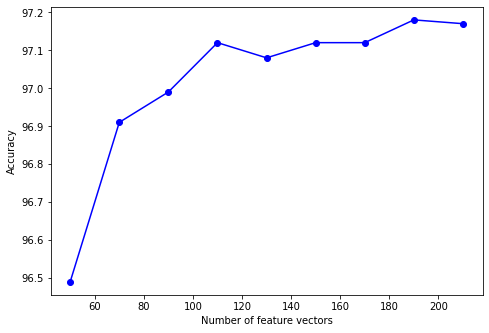

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(x, y, '-ok',color = 'blue')
ax.set_xlabel('Number of feature vectors')
ax.set_ylabel('Accuracy')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
################### Convolution Neural Network ####################

In [ ]:
pipeline_data = 

In [ ]:
################### Translated and Rotated MNIST Image Data ########

In [ ]:
import cv2 as cv

In [ ]:
test_images = test[:3000]

def translated_data(images = test_images, x = 6, y = 3):
    translated_data = np.zeros((np.shape(images)[0],28,28))
    M = np.float32([[1,0,x],[0,1,y]])
    for i in range(0,np.shape(images)[0]):
        translated_data[i] =  cv.warpAffine(images[i],M,(28,28))
    return translated_data

angle =[10,20,30,-10,-20,-30]

def rotate_data(images = test_images, angle = 30):
    rotated_data = np.zeros((np.shape(images)[0],28,28))
    M = cv.getRotationMatrix2D((14,14),angle,1)
    for i in range(0,np.shape(images)[0]):
        rotated_data[i] =  cv.warpAffine(images[i],M,(28,28))
    return rotated_data

In [ ]:
translateddata = np.zeros((4,3000,28,28))
translateddata[0] = translated_data(x = 6, y = 3)
translateddata[1] = translated_data(x = 6, y = -3)
translateddata[2] = translated_data(x = -6, y = 3)
translateddata[3] = translated_data(x = -6, y = -3)

In [ ]:
rotateddata = np.zeros((6,3000,28,28))
for i in range(0,6):
    rotateddata[i] = rotate_data(angle = angle[i])

In [ ]:
for i in range(0,4):
  images = translateddata[i]  
  conjugate_images = np.zeros((3000,28,28))
  for j in range(0,3000):
    conjugate_images[i,:,:] =  255 - images[i,:,:]
  transformer = gtda.images.Binarizer(threshold = 0.2).fit(images)
  binarized_images= transformer.transform(images)*1
  height_data = height_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
  density_data = density_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
  radial_data = radial_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
  line_data = line_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
  grayscale_data = grayscale_data_fn(images = images, ent = True, wdist = True, land = True, betti = True)
  conjugate_data = grayscale_data_fn(images = conjugate_images, ent = True, wdist = True, land = True, betti = True)
  vr_data = vr_data_fn(images = binarized_images, ent = True)
  pd.DataFrame(np.concatenate((height_data, radial_data, density_data, line_data, grayscale_data,conjugate_data, vr_data),axis = 1)).to_csv("Translated_"+str(i)+".csv")

In [ ]:
! zip translated.zip *.csv
! mv translated.zip path

  adding: Translated_0.csv (deflated 61%)
  adding: Translated_1.csv (deflated 61%)
  adding: Translated_2.csv (deflated 61%)
  adding: Translated_3.csv (deflated 61%)


In [ ]:
! mv translated.zip "/content/drive/MyDrive/Translated_Rotated_6_4_21"

mv: cannot stat 'translated.zip': No such file or directory


In [ ]:
for i in range(0,6):
  images = rotateddata[i]  
  conjugate_images = np.zeros((3000,28,28))
  for j in range(0,3000):
    conjugate_images[i,:,:] =  255 - images[i,:,:]
  transformer = gtda.images.Binarizer(threshold = 0.2).fit(images)
  binarized_images= transformer.transform(images)*1
  height_data = height_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
  density_data = density_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
  radial_data = radial_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
  line_data = line_data_fn(images = binarized_images, ent = True, land = True, wdist = True, betti = True)
  grayscale_data = grayscale_data_fn(images = images, ent = True, wdist = True, land = True, betti = True)
  conjugate_data = grayscale_data_fn(images = conjugate_images, ent = True, wdist = True, land = True, betti = True)
  vr_data = vr_data_fn(images = binarized_images, ent = True)
  pd.DataFrame(np.concatenate((height_data, radial_data, density_data, line_data, grayscale_data,conjugate_data, vr_data),axis = 1)).to_csv("Rotated_"+str(i)+".csv")

In [ ]:
! zip rotated.zip *.csv
! mv rotated.zip "/content/drive/MyDrive/Translated_Rotated_6_4_21"